In [1]:
!pip install transformers
! pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# from transformers import AutoModelForCausalLM, AutoTokenizer

# model_id = "meta-llama/Llama-3.2-3B"

# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForCausalLM.from_pretrained(model_id, output_attentions=True)



In [3]:
from transformers import BertModel, BertTokenizer

# Load model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased', output_attentions=True)

/home/oleksii/python/semantic_chunking/sem_chunk_overview/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
with open('./paul_graham_essay.txt', 'r') as file:
    text = file.read()

text = text.split('\n\n')
text

["A Student's Guide to Startups",
 'Want to start a startup? Get funded by Y Combinator.',
 'October 2006',
 'This essay is derived from a talk at MIT.',
 'Till recently graduating seniors had two choices: get a job or go to grad school. I think there will increasingly be a third option: to start your own startup. But how common will that be?',
 "I'm sure the default will always be to get a job, but starting a startup could well become as popular as grad school. In the late 90s my professor friends used to complain that they couldn't get grad students, because all the undergrads were going to work for startups. I wouldn't be surprised if that situation returns, but with one difference: this time they'll be starting their own instead of going to work for other people's.",
 "The most ambitious students will at this point be asking: Why wait till you graduate? Why not start a startup while you're in college? In fact, why go to college at all? Why not start a startup instead?",
 "A year an

In [5]:
text = text[4]
text

'Till recently graduating seniors had two choices: get a job or go to grad school. I think there will increasingly be a third option: to start your own startup. But how common will that be?'

In [6]:
tokens = tokenizer(text, return_tensors='pt')
tokens

{'input_ids': tensor([[  101, 22430,  3055,  6282, 20566,  1125,  1160,  9940,   131,  1243,
           170,  2261,  1137,  1301,  1106,   176,  9871,  1278,   119,   146,
          1341,  1175,  1209,  5672,  1129,   170,  1503,  5146,   131,  1106,
          1838,  1240,  1319,  1838,  4455,   119,  1252,  1293,  1887,  1209,
          1115,  1129,   136,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [7]:
str_tokens = tokenizer.convert_ids_to_tokens(tokens['input_ids'][0])
str_tokens

['[CLS]',
 'Till',
 'recently',
 'graduating',
 'seniors',
 'had',
 'two',
 'choices',
 ':',
 'get',
 'a',
 'job',
 'or',
 'go',
 'to',
 'g',
 '##rad',
 'school',
 '.',
 'I',
 'think',
 'there',
 'will',
 'increasingly',
 'be',
 'a',
 'third',
 'option',
 ':',
 'to',
 'start',
 'your',
 'own',
 'start',
 '##up',
 '.',
 'But',
 'how',
 'common',
 'will',
 'that',
 'be',
 '?',
 '[SEP]']

In [8]:
output = model(**tokens)
output

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.3765,  0.2533, -0.1041,  ..., -0.0906,  0.1774, -0.1033],
         [ 0.2281, -0.2291,  0.4784,  ..., -0.1279,  0.1995,  0.0335],
         [-0.3659,  0.1345, -0.0542,  ...,  0.5734, -0.1369,  0.5882],
         ...,
         [ 0.1012,  0.0710,  0.3215,  ...,  0.3884, -0.6856,  0.0480],
         [ 0.5627, -0.1366,  0.0387,  ...,  0.3191, -0.5432,  0.1309],
         [ 0.5407,  0.2373,  0.3461,  ...,  0.4322, -0.4302,  0.0184]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-5.5294e-01,  4.1934e-01,  9.9963e-01, -9.8741e-01,  9.4924e-01,
          9.1936e-01,  9.7947e-01, -9.9692e-01, -9.5434e-01, -7.0185e-01,
          9.6017e-01,  9.9699e-01, -9.9933e-01, -9.9963e-01,  8.5841e-01,
         -9.5913e-01,  9.7518e-01, -5.0274e-01, -9.9990e-01, -8.1639e-01,
         -5.1299e-01, -9.9969e-01,  1.9104e-01,  9.8160e-01,  9.5953e-01,
          5.5474e-02,  9.6967e-01,  9.9991e-01,  8.8279e-01, -5.083

In [9]:
attention_weight = output.attentions
last_layer = attention_weight[-1]
last_layer[0].shape

torch.Size([12, 44, 44])

In [10]:
import numpy as np 

layer_max = np.max(last_layer[0].detach().numpy(), axis=0) 
layer_max.shape

(44, 44)

In [11]:
layer_max

array([[0.21443373, 0.01766625, 0.04758381, ..., 0.08910832, 0.11113317,
        0.29647717],
       [0.00572581, 0.06648897, 0.0355789 , ..., 0.00412892, 0.00760602,
        0.34671444],
       [0.03080031, 0.05972854, 0.43214887, ..., 0.02397385, 0.03416734,
        0.33987907],
       ...,
       [0.01407872, 0.01726168, 0.01581187, ..., 0.8849777 , 0.0168243 ,
        0.37829566],
       [0.1047723 , 0.03811868, 0.02674866, ..., 0.05462652, 0.3903841 ,
        0.35114792],
       [0.03123521, 0.03201154, 0.02730112, ..., 0.02777973, 0.04441747,
        0.09829328]], shape=(44, 44), dtype=float32)

<Axes: >

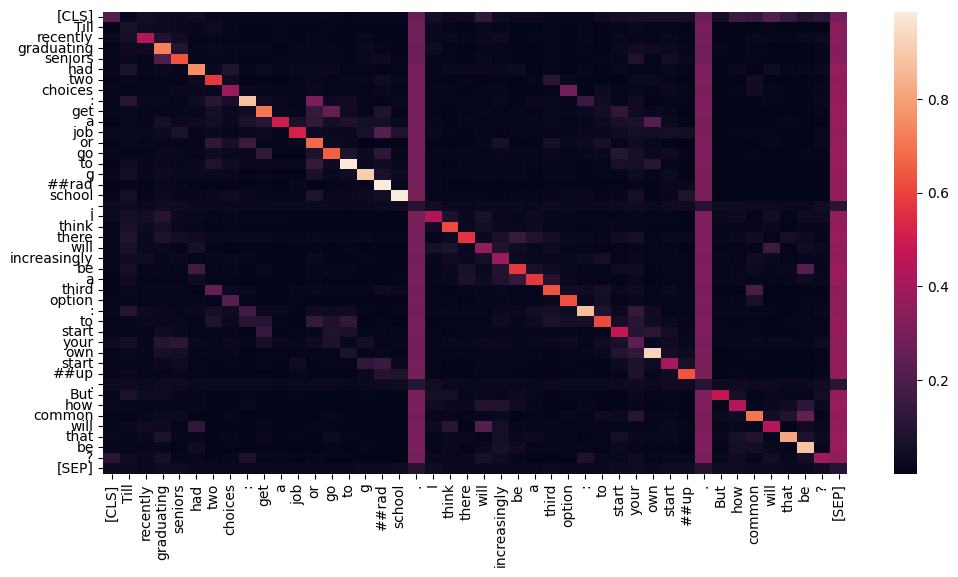

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) 

sns.heatmap(layer_max, fmt='.2f', xticklabels=str_tokens, yticklabels=str_tokens) 